
#### Written by: Yousuf Shah
#### Subject: EDA On Googleplaystore Dataset
#### Date: 06.04.2024
#### Email: contact.ys09@gmail.com

---

# Google Playstore Data

# About dataset

- Description
   The dataset was downloaded from kaggle,from the following [Link](https://www.kaggle.com/datasets/lava18/google-play-store-apps)

#### **Context**

While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

#### **Content**

Each app (row) has values for catergory, rating, size, and more.

#### **Acknowledgements**

This information is scraped from the Google Play Store. This app information would not be available without it.

#### **Inspiration**

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
# %matplotlib inline for jupyter notebook to show the plot in the notebook itself instead of opening a new window for the plot

# Hide All Warnings
import warnings
warnings.simplefilter('ignore')

# Data loading and Exploration or cleaning

#### Load the csv file

In [2]:
df=pd.read_csv('googleplaystore.csv')

#### Let's have a look on Top 5 rows of the data

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 13
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design,Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,NaN
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,NaN
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design,Creativity,"June 20, 2018",1.1,4.4 and up


#### Important things to know

In [4]:
# Set option to see maximum rows and columns in dataset 
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [5]:
# Print all columns name
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Unnamed: 13'],
      dtype='object')

In [6]:
# print how many rows and columns in our dataset 
print(f'The number of Rows are : {df.shape[0]}')
print()
print(f'The number of Columns are : {df.shape[1]}')

The number of Rows are : 10841

The number of Columns are : 14


In [7]:
# Show info of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
 13  Unnamed: 13     499 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


# Let's deal with the 
1. Size 
2. Installs
3. Price 

because python is showing that column into object even that is not object so we convert them into numeric

# **Size**

### remove M,k and Varies with device from `Size`
### and in the place of Varies with device we place nan values
### rest convert into MBs and convert Size column into float numbers

In [8]:
# Rename column 
df.rename(columns={'Size':'size_in_MBs'},inplace=True)

In [9]:
df['size_in_MBs'].value_counts()

size_in_MBs
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
3.4M                    65
2.8M                    65
32M                     63
3.7M                    63
34M                     63
3.9M                    62
3.0M            

## Observation 
1. Varies with device
2. M
3. k

In [10]:
# Missing values check
df['size_in_MBs'].isnull().sum()

np.int64(0)

- No missing values in Size column 

In [11]:
# Find the values having 'M' in them
df['size_in_MBs'].loc[df['size_in_MBs'].str.contains('M')].value_counts().sum()

np.int64(8830)

In [12]:
# Find the values having 'k' in them
df['size_in_MBs'].loc[df['size_in_MBs'].str.contains('k')].value_counts().sum()

np.int64(316)

In [13]:
# Find the values having 'Varies with device' in them
df['size_in_MBs'].loc[df['size_in_MBs'].str.contains('Varies with device')].value_counts().sum()

np.int64(1695)

# for conformation 

In [14]:
len(df)

10841

In [15]:
1695+316+8830

10841

- Both are equal we are good to go

In [16]:
# define a funciton that convert size_in_MBs into numeric dtype
def convert_size(size_in_MBs):

    if isinstance(size_in_MBs, str):
        if 'k' in size_in_MBs:
            return float(size_in_MBs.replace('k', '')) / 1024
        elif 'M' in size_in_MBs:
            return float(size_in_MBs.replace('M', ''))
        elif 'Varies with device' in size_in_MBs:
            return np.nan
    return size_in_MBs


In [17]:
# Apply the function to the size_in_MBs column
# apply means convert_size funtion will implement on size_in_MBs
df['size_in_MBs'] = df['size_in_MBs'].apply(convert_size)

In [18]:
df['size_in_MBs'].dtype

dtype('float64')

# **Installs**

1. Remove + sign
2. Remove comma
3. convert the column into an integer not float because\
install is descrete values 

In [19]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [20]:
# Check null values 
df['Installs'].isnull().sum() # No null values

np.int64(0)

In [21]:
# find how many values has '+' in it
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

np.int64(10840)

In [22]:
# remove + sign form the Installs column in the last i give if condition it means
# if '+' sign is avaliable in x means Installs column then remove if rows has now '+' 
# sign then keep it him same 
df['Installs']=df['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)

In [23]:
# removing comma 
df['Installs']=df['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)

In [24]:
# convert into integer 
df['Installs']=df['Installs'].apply(lambda x: int(x))

In [25]:
# Making a new column name "install_category" which will have the category of Installs
bins=[-1, 0 , 10 , 1000 , 10000 , 100000 , 1000000 , 10000000 , 10000000000]

labels=['No' , 'Very Low' , 'Low' , 'Moderate' , 'More Than Moderate' , 'High' , 'Very High' , 'Top Notch']

df['install_category']=pd.cut(df['Installs'],bins=bins,labels=labels)

In [26]:
df['install_category'].value_counts()

install_category
Low                   2162
High                  2118
Very High             2004
More Than Moderate    1648
Moderate              1531
Top Notch              828
Very Low               535
No                      15
Name: count, dtype: int64

# **Price**

## remove $ sign and convert into float numbers

In [27]:
# check missing values
df.Price.isnull().sum() # no null values

np.int64(0)

In [28]:
# check how many values have $ sign
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

np.int64(800)

In [29]:
# count number of values in the price column contains 0 but does not contain $ sign
df['Price'].loc[df['Price'].str.contains('0')&(~df['Price'].str.contains('\$'))].value_counts().sum()

np.int64(10041)

In [30]:
# remove $ sign from Price column 
df['Price']=df['Price'].apply(lambda x: x.replace('$','') if '$' in str(x) else x)

In [31]:
# Price is float column so we convert him into float numbers
df['Price']=df['Price'].apply(lambda x: float(x))

In [32]:
df['Price'].value_counts()

Price
0.00      10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
3.49          7
7.99          7
24.99         7
5.49          6
19.99         6
6.49          5
8.99          5
12.99         5
11.99         5
10.00         3
1.00          3
16.99         3
2.00          3
17.99         2
10.99         2
9.00          2
79.99         2
7.49          2
3.95          2
33.99         2
1.70          2
13.99         2
8.49          2
39.99         2
1.50          1
25.99         1
74.99         1
15.99         1
3.88          1
1.76          1
3.02          1
400.00        1
4.84          1
2.50          1
1.59          1
1.61          1
4.77          1
5.00          1
1.29          1
379.99        1
299.99        1
37.99         1
18.99         1
389.99        1
19.90         1
1.75          1
14.00         1
4.

In [33]:
# summary of dataset
df.describe()

,Rating,Reviews,size_in_MBs,Installs,Price
count,9367.000000,1.084100e+04,9146.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,21.514141,1.546291e+07,1.027273
std,0.515735,2.927629e+06,22.588679,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


# Now jump into the missing values

In [34]:
# Find missing values
df.isnull().sum().sort_values(ascending=False)

Unnamed: 13         10342
size_in_MBs          1695
Rating               1474
Current Ver             8
Android Ver             2
Type                    1
Category                1
Genres                  1
Installs                0
App                     0
Reviews                 0
Last Updated            0
Content Rating          0
Price                   0
install_category        0
dtype: int64

In [35]:
# Check missing values in percentage
round(df.isnull().sum()/len(df)*100,3).sort_values(ascending=False) # 3 means round upto 3 values

Unnamed: 13         95.397
size_in_MBs         15.635
Rating              13.597
Current Ver          0.074
Android Ver          0.018
Type                 0.009
Category             0.009
Genres               0.009
Installs             0.000
App                  0.000
Reviews              0.000
Last Updated         0.000
Content Rating       0.000
Price                0.000
install_category     0.000
dtype: float64

In [36]:
# Remove Unnamed: 13 column because it is not neccessary to our dataset and having above 70% of missing values
df.drop('Unnamed: 13',axis=1,inplace=True) # axis 1 means remove column and inplace True means updata my dataframe which i change

In [37]:
# Find total number of missing values
df.isnull().sum().sum()

np.int64(3182)

<Axes: >

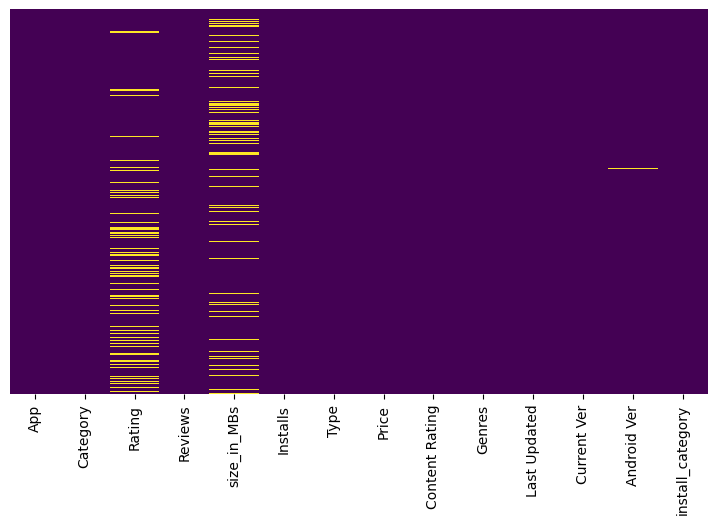

In [38]:
# plot of missing values
plt.figure(figsize=(9,5))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis') # cbar hide colour legend , cmap is used for colormap
                                                                     # and yticklabels hide rows number you can see yourself 
                                                                     # by practice this code

Text(0.5, 1.0, 'Percentage of missing values in each column')

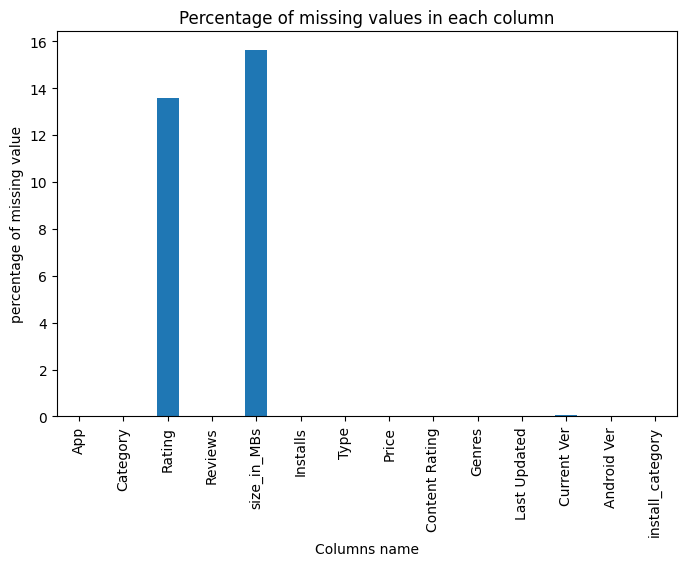

In [39]:
# make a plot for percentage missing values

# set figure size
plt.figure(figsize=(8,5))
# plot the null values by their percentage in each column
missing_perc=df.isnull().sum()/len(df)*100
missing_perc.plot(kind='bar')
# add the labels
plt.xlabel('Columns name')
plt.ylabel('percentage of missing value')
plt.title('Percentage of missing values in each column')

Text(0.5, 1.0, 'Percentage of missing values in each column')

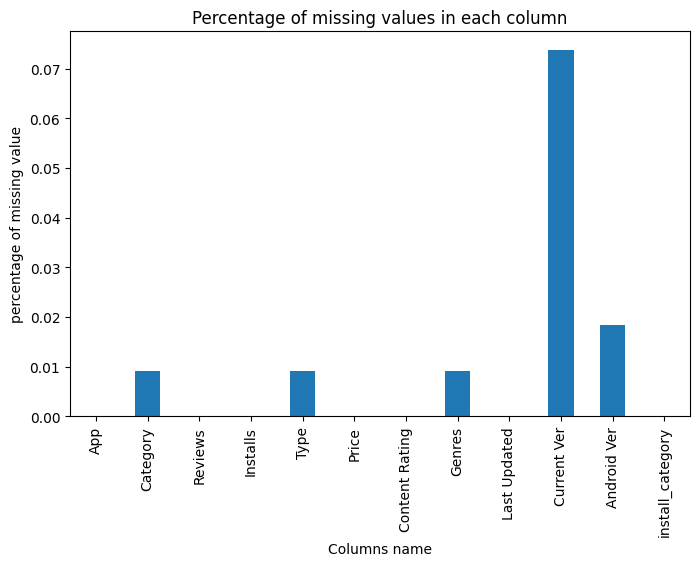

In [40]:
# set figure size
plt.figure(figsize=(8,5))
# print less then 1% missing values
missing_perc[missing_perc<1].plot(kind='bar')
# add the labels
plt.xlabel('Columns name')
plt.ylabel('percentage of missing value')
plt.title('Percentage of missing values in each column')

In [41]:
# this will show the number of null values in each column in descending order
df.isnull().sum().sort_values(ascending=False) 

size_in_MBs         1695
Rating              1474
Current Ver            8
Android Ver            2
Category               1
Type                   1
Genres                 1
Installs               0
App                    0
Reviews                0
Content Rating         0
Price                  0
Last Updated           0
install_category       0
dtype: int64

In [42]:
# this will show the percentage of null values in each column
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

size_in_MBs         15.635089
Rating              13.596532
Current Ver          0.073794
Android Ver          0.018448
Category             0.009224
Type                 0.009224
Genres               0.009224
Installs             0.000000
App                  0.000000
Reviews              0.000000
Content Rating       0.000000
Price                0.000000
Last Updated         0.000000
install_category     0.000000
dtype: float64

## Observations:
---
- We have 1695 missing values in the `'Size_in_bytes'` and `'Size_in_Mb'` columns, which is 15.6% of the total values in the column.
- We have 1474 missing values in the `'Rating'` column, which is 13.6% of the total values in the column.
- We have 8 missing value in the `'Current Ver'` column, which is 0.07% of the total values in the column.
- We have 2 missing values in the `'Android Ver'` column, which is 0.01% of the total values in the column.
- We have only 1 missing value in `Category`, `Type` and `Genres` columns, which is 0.009% of the total values in the column.

### **2.3. Dealing with the missing values**
- We can not impute the `Rating` column as is is directly linked with the installation column. To test this Hypothesis we need to plot the `Rating` column with the `Installs` and `Size` columns and statistically test it using `pearson correlation test`.
---

# **Let's run the correlations**

In [43]:
# These are numeric columns
df.describe()

,Rating,Reviews,size_in_MBs,Installs,Price
count,9367.000000,1.084100e+04,9146.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,21.514141,1.546291e+07,1.027273
std,0.515735,2.927629e+06,22.588679,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,4.900000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,30.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


<Axes: >

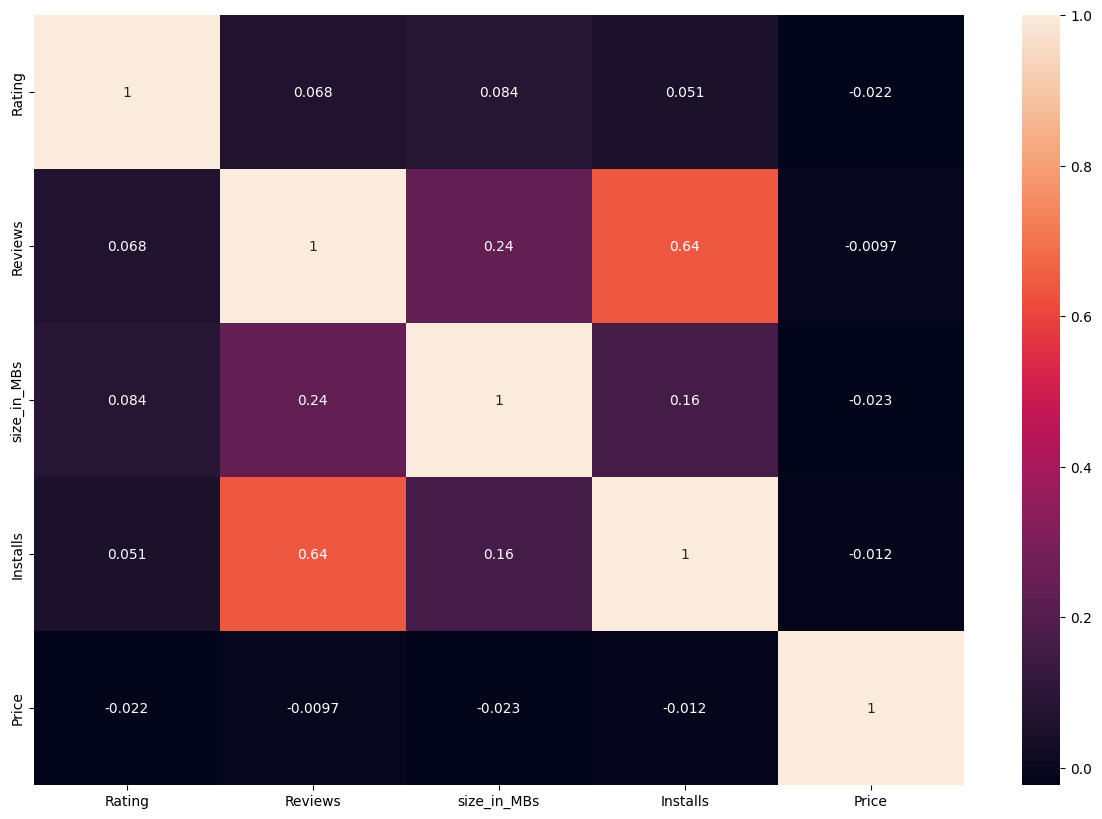

In [44]:
# Make a correlation matrix of numeric columns

# Make figure size
plt.figure(figsize=(15,10))
# Make a list of numeric columns
numeric_columns=["Rating","Reviews","size_in_MBs","Installs","Price"]

# Plot the correlation matrix
sns.heatmap(df[numeric_columns].corr(),annot=True)


In [45]:
df['size_in_MBs'].describe()

count    9146.000000
mean       21.514141
std        22.588679
min         0.008301
25%         4.900000
50%        13.000000
75%        30.000000
max       100.000000
Name: size_in_MBs, dtype: float64

In [46]:
# we can also calculate the correlation matrix using pandas
df[numeric_columns].corr() # this will show the correlation matrix

,Rating,Reviews,size_in_MBs,Installs,Price
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666
size_in_MBs,0.084098,0.238218,1.000000,0.164794,-0.023000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000


---
## **Observations**
- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the `Reviews` column has a high correlation with the `Installs` column, which is `0.64` according to corr(). Which is quite good.
  - This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
    - If we have an ap with `2` installs and we imputer the reviews with `1000` or via average reviews then it will be wrong.
- Installs is slightly correlated with `Size_in_Mb` or `Size_in_bytes` , which is `0.16`, this also shows us the importance of size and Installs. But we can not depend on it as the Peason correlation is very low.
---

- Before going ahead, let's remove the rows with missing values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns, as they are very less in number and will not affect our analysis.

In [47]:
# length before removing null values
print(f"Length of the dataframe before removing null values: {len(df)}")

Length of the dataframe before removing null values: 10841


In [48]:
# remove the rows having null values in the 'Current Ver', 'Android Ver', 'Category', 'Type' and 'Genres' column
df.dropna(subset=['Current Ver','Android Ver','Category','Type','Genres'],inplace=True)

In [49]:
# length after removing null values
print(f"Length of the dataframe after removing null values: {len(df)}")

Length of the dataframe after removing null values: 10829


- We have removed `12` rows having null values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns.

In [50]:
# let's check the null values again
df.isnull().sum().sort_values(ascending=False)

size_in_MBs         1694
Rating              1469
Category               0
App                    0
Reviews                0
Installs               0
Type                   0
Price                  0
Content Rating         0
Genres                 0
Last Updated           0
Current Ver            0
Android Ver            0
install_category       0
dtype: int64

---
## **Observations**
- Only `Rating` and `size_in_MBs` columns are left with missing values.
  - We know that we have to be carefull while deadling with `Rating` column, as it is directly linked with the `Installs` column.
  - In Size columns we already know about `Varies with device` values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.
---

In [51]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'size_in_MBs', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'install_category'],
      dtype='object')

# Jump into the Rating column to fill missing values

### I am going to do that in `install_category`  `No` has mean NaN means 0 install so i fill this type of category with 0 
### and Very low will be fill by 4.6 , Low will be fill by 4.17 respectively remember all values we will fill in `Rating` column 

In [52]:
# use group by function to find the trend of Rating in each install_category
df.groupby('install_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
install_category,,,,,,,,
No,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very Low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More Than Moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


In [53]:
# in which Install_category the Rating has NaN values
df['install_category'].loc[df['Rating'].isnull()].value_counts()

install_category
Low                   880
Very Low              453
Moderate               88
More Than Moderate     31
No                     14
High                    3
Very High               0
Top Notch               0
Name: count, dtype: int64

In [54]:
# Now fill values base on install_category i mean to say group by filling with respect to install_category ]
# transform means fillin values by grouping
df['Rating'] = df.groupby('install_category')['Rating'].transform(lambda x: x.fillna(x.mean()))

In [55]:
df['install_category'].loc[df['Rating'].isnull()].value_counts()

install_category
No                    14
Very Low               0
Low                    0
Moderate               0
More Than Moderate     0
High                   0
Very High              0
Top Notch              0
Name: count, dtype: int64

In [56]:
# 'No' has 14 means mean is NaN you can see in above code so we will fill Rating column with 0
df.Rating.fillna(0,inplace=True)

In [57]:
df['install_category'].loc[df['Rating'].isnull()].value_counts()

install_category
No                    0
Very Low              0
Low                   0
Moderate              0
More Than Moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

In [58]:
# Now check missing values
df.isnull().sum()

App                    0
Category               0
Rating                 0
Reviews                0
size_in_MBs         1694
Installs               0
Type                   0
Price                  0
Content Rating         0
Genres                 0
Last Updated           0
Current Ver            0
Android Ver            0
install_category       0
dtype: int64

# Jump into the size_in_MBs 

## I will fill missing values same as Rating 
## but there category column name is `Category`

In [59]:
# in which Category the size_in_MBs has NaN values
df['Category'].loc[df['size_in_MBs'].isnull()].value_counts()

Category
FAMILY                 139
GAME                   129
COMMUNICATION          122
PRODUCTIVITY           121
TOOLS                  104
SOCIAL                  85
PHOTOGRAPHY             81
HEALTH_AND_FITNESS      77
SPORTS                  73
NEWS_AND_MAGAZINES      67
TRAVEL_AND_LOCAL        66
BUSINESS                60
FINANCE                 59
SHOPPING                59
ENTERTAINMENT           59
EDUCATION               45
VIDEO_PLAYERS           44
PERSONALIZATION         37
LIFESTYLE               37
BOOKS_AND_REFERENCE     34
MEDICAL                 29
MAPS_AND_NAVIGATION     29
FOOD_AND_DRINK          27
WEATHER                 25
DATING                  22
HOUSE_AND_HOME          20
AUTO_AND_VEHICLES       10
COMICS                   9
EVENTS                   7
PARENTING                6
BEAUTY                   6
ART_AND_DESIGN           3
LIBRARIES_AND_DEMO       3
Name: count, dtype: int64

In [60]:
# Now fill values base on Category i mean to say group by filling with respect to Category 
# transform means fillin values by grouping
df['size_in_MBs']= df.groupby('Category')['size_in_MBs'].transform(lambda x:x.fillna(x.mean()))

In [61]:
# Now check null values
df.isnull().sum()

App                 0
Category            0
Rating              0
Reviews             0
size_in_MBs         0
Installs            0
Type                0
Price               0
Content Rating      0
Genres              0
Last Updated        0
Current Ver         0
Android Ver         0
install_category    0
dtype: int64

# Now visuilization part

<Axes: xlabel='install_category', ylabel='Reviews'>

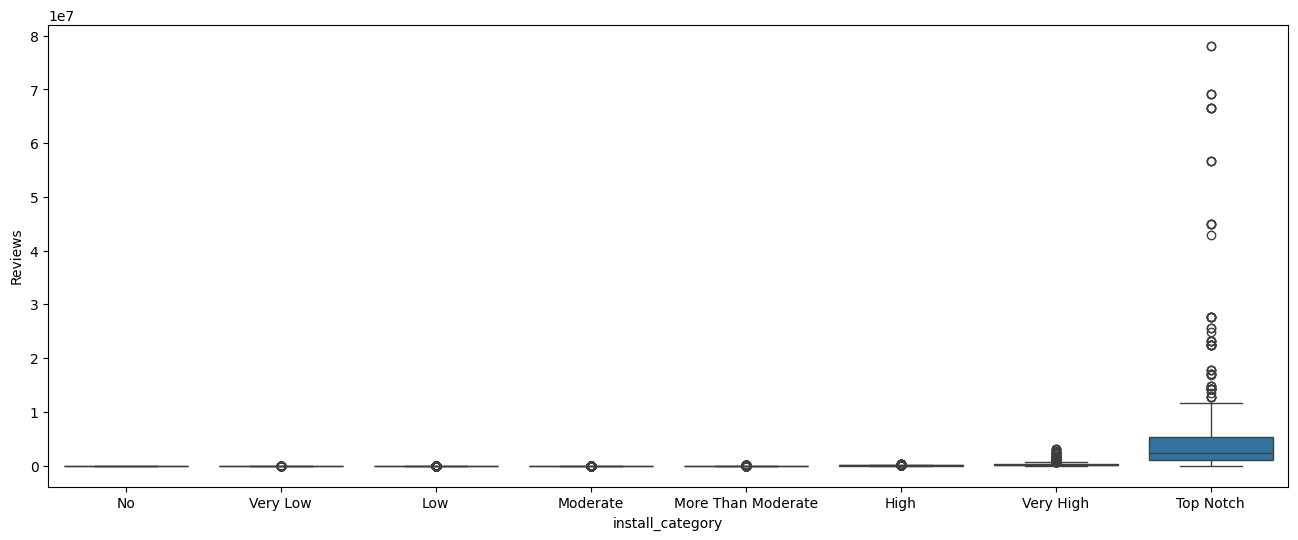

In [62]:
# Make a box plot for Reviews column 
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='install_category', y= 'Reviews', data=df) # plot the boxplot

### The data looks really imbalance, let's normalize the data using log transformation

<Axes: xlabel='install_category', ylabel='Reviews'>

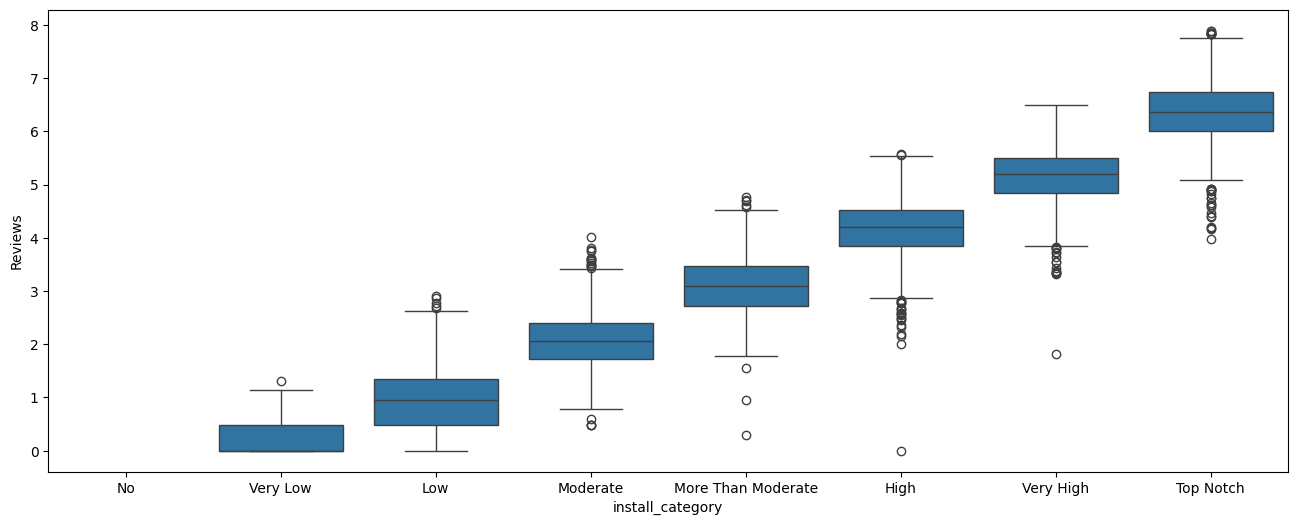

In [63]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='install_category', y= np.log10(df['Reviews']), data=df) # plot the boxplot

### We also draw the scatter plot of the `Rating` and `Review` columns with the `install_category` column

<Axes: xlabel='Rating', ylabel='Reviews'>

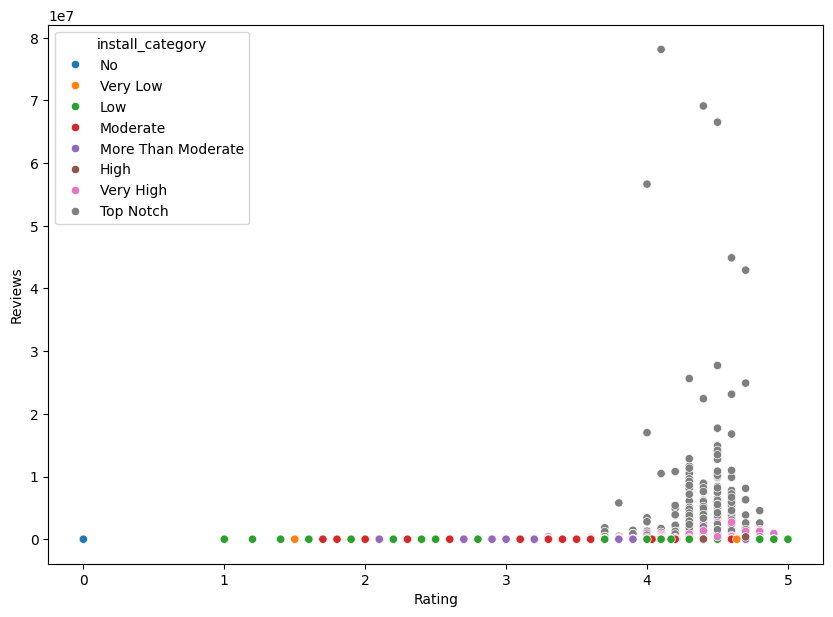

In [64]:
# Draw a scatter plot among Review , Rating and Installs
plt.figure(figsize=(10,7)) # make figure size
sns.scatterplot(x='Rating' , y='Reviews' , hue='install_category' , data=df) # plot the scatter plot

###  It doesn't show any trend, because, you should know that Rating is a categorical variable (Ordinal) and Reviews is a continuous variable, therefore, we can not plot them together.
###  Let's try with Reviews and Installs

<Axes: xlabel='Reviews', ylabel='Installs'>

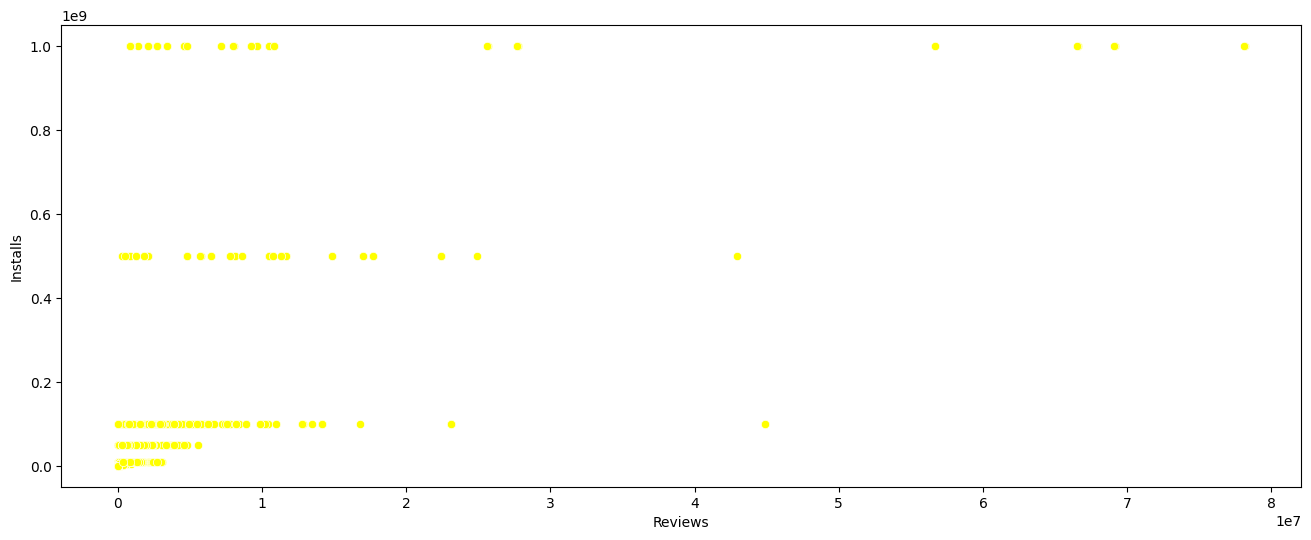

In [65]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Reviews' , y='Installs' , data=df , color='yellow') # plot the scatter plot

# My dear sir Dr. Mohammad Ammar Tufail Favirout Colour 'Yellow' that's why i pic this colour


###  We did not see any trend and the issue is we need to normalize the data before plotting it, let's try with log transformation

<Axes: xlabel='Reviews', ylabel='Installs'>

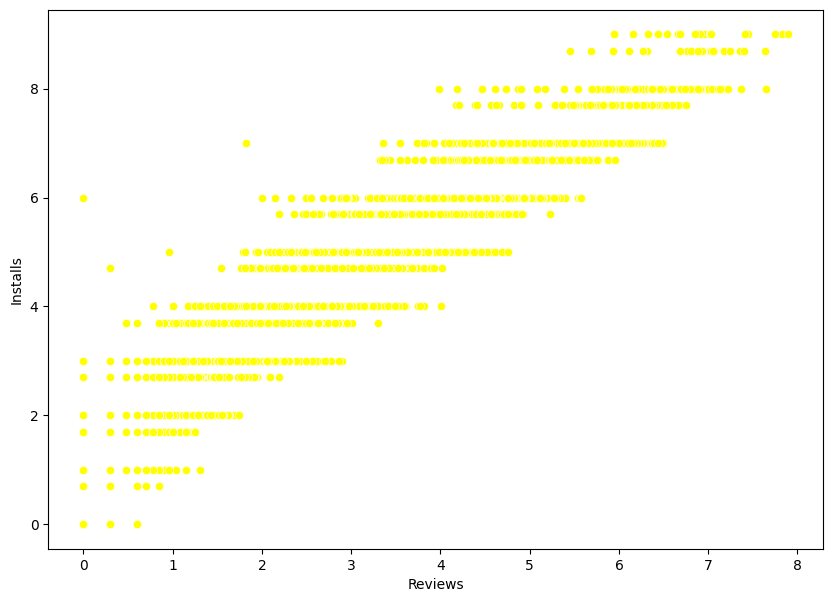

In [66]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(10,7)) # make a figure size
sns.scatterplot(data=df , x=np.log10(df['Reviews']) , y=np.log10(df['Installs']) , color='yellow') # Plot the scatter plot

### Let's plot a line plot to see the trend

<Figure size 1600x600 with 0 Axes>

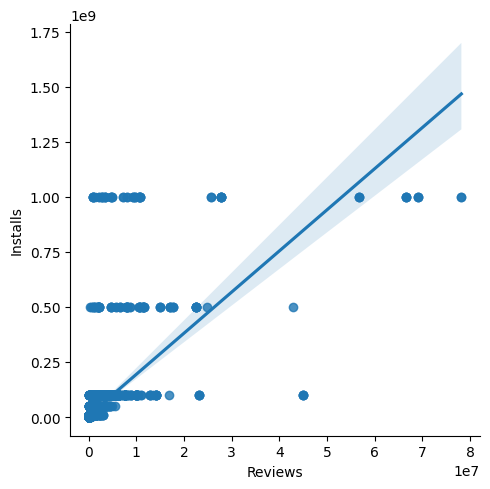

In [67]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Reviews', y='Installs', data=df) # plot the scatter plot with trend line


### Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious.

# Checking and removing duplicates

In [68]:
# print the number of duplicates in df
print(f"Number of duplicates in df are: {df.duplicated().sum()}")

Number of duplicates in df are: 483


In [69]:
# find exact duplicates and print them
df[df['App'].duplicated(keep=False)].sort_values(by='App').head(10)

,App,Category,Rating,Reviews,size_in_MBs,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,High
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,High
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,High
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26.0,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,High
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,Low
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up,Low
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,More Than Moderate
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15.0,100000,Free,0.00,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up,More Than Moderate
3083,365Scores - Live Scores,SPORTS,4.6,666521,25.0,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,Very High
5415,365Scores - Live Scores,SPORTS,4.6,666246,25.0,10000000,Free,0.00,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up,Very High


### You can see complete row is duplicate 
### Remove duplicates means remove complete row from dataframe


In [70]:
# remove duplicate
df.drop_duplicates(inplace=True)

In [71]:
# Check duplicate
df.duplicated().sum()

np.int64(0)

In [72]:
# number of rows after removing duplicates
print(f'The number of Rows after removing duplicates {df.shape[0]}')


The number of Rows after removing duplicates 10346


### Now we have removed 483 duplicates from the dataset. and have 10346 rows left.

---

## **Insights from Data**

## **Which category has the highest number of apps?**

In [73]:
# which category has highest number of apps
df['Category'].value_counts().head(10) # this will show the top 10 categories with highest number of apps

Category
FAMILY             1939
GAME               1121
TOOLS               841
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     386
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64

# **Which category has the highest number of installs?**

In [74]:
# category with highest number of Installs
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

# **Which category has the highest number of reviews?**

In [75]:
# Category with highest number of Reviews
df.groupby('Category')['Reviews'].sum().sort_values(ascending=False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

# **Which category has the highest rating?**

In [76]:
# Category with highest average Rating
df.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)

Category
EVENTS                 4.394346
EDUCATION              4.373794
BOOKS_AND_REFERENCE    4.358435
PERSONALIZATION        4.322099
ART_AND_DESIGN         4.298885
GAME                   4.281926
HEALTH_AND_FITNESS     4.273890
PARENTING              4.259759
SHOPPING               4.253376
SPORTS                 4.253041
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Count'>

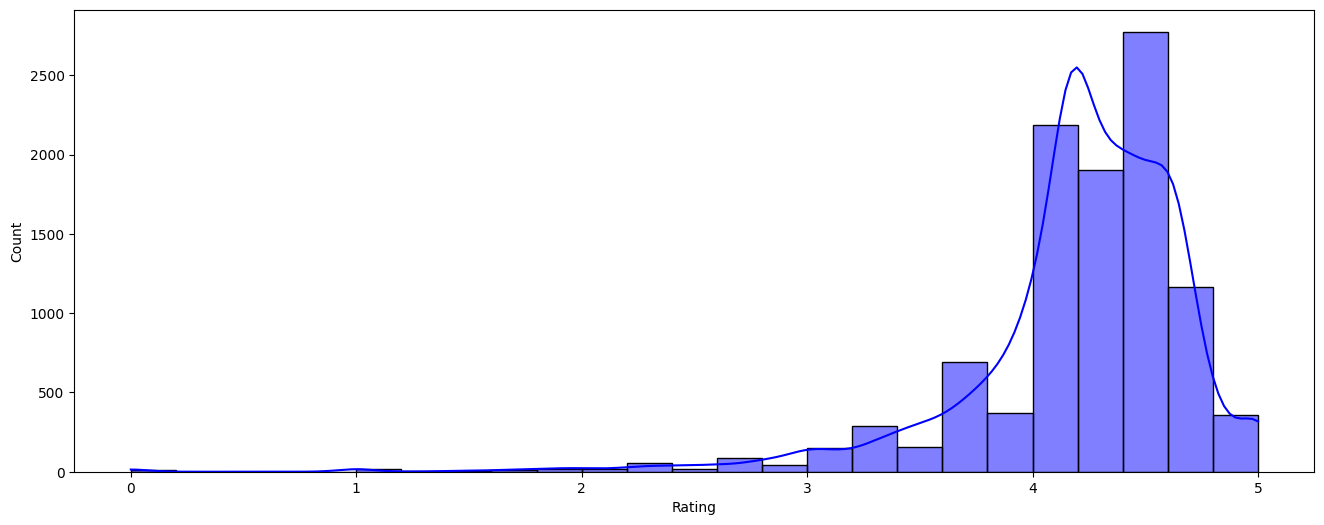

In [77]:
# plot the rating distribution
plt.figure(figsize=(16, 6)) # set figure size
sns.histplot(df['Rating'], color="blue", kde=True, bins=25) # plot the distribution plot

### **Check Distribution Through Shapiro Wilk Test**

#### Shapiro Wilk Test
- Test Says If pvalue is greater Then 0.05 So We Fail To Reject Null Hypothesis: (H0) Means (Accept Null Hypothesis) Which Says Data Is Normal Distributed And Vice Versa

- Null Hypothesis: H0 : Rating Column is Normal Distributed 

- Alternatinve Hypothesis: H1 : Rating Column is Not Normal Distributed 

In [78]:
# Check Distribution Through Shapiro Wilk Test

import scipy.stats as stats
# Apply Test
statistic, pvalue=stats.shapiro(df['Rating'])
print(f'Statistic Value : {statistic}')
print()
print(f'Pvalue : {pvalue}')
print()

# See Results Throuhg if else conditions

if pvalue > 0.05:
    print(f'pvalue:({pvalue}) is Greater Then 0.05 Fail to Reject Null Hypothesis')
else:
    print(f'pvalue:({pvalue}) is less Then 0.05 Reject Null Hypothesis')



Statistic Value : 0.8268346720422337

Pvalue : 3.060062900573678e-74

pvalue:(3.060062900573678e-74) is less Then 0.05 Reject Null Hypothesis


# Which content rating is most popular in installs


In [79]:
df['Content Rating'].value_counts() # this will show the value counts of each content rating

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

# plot top 5 rated paid apps


<Axes: xlabel='App', ylabel='Rating'>

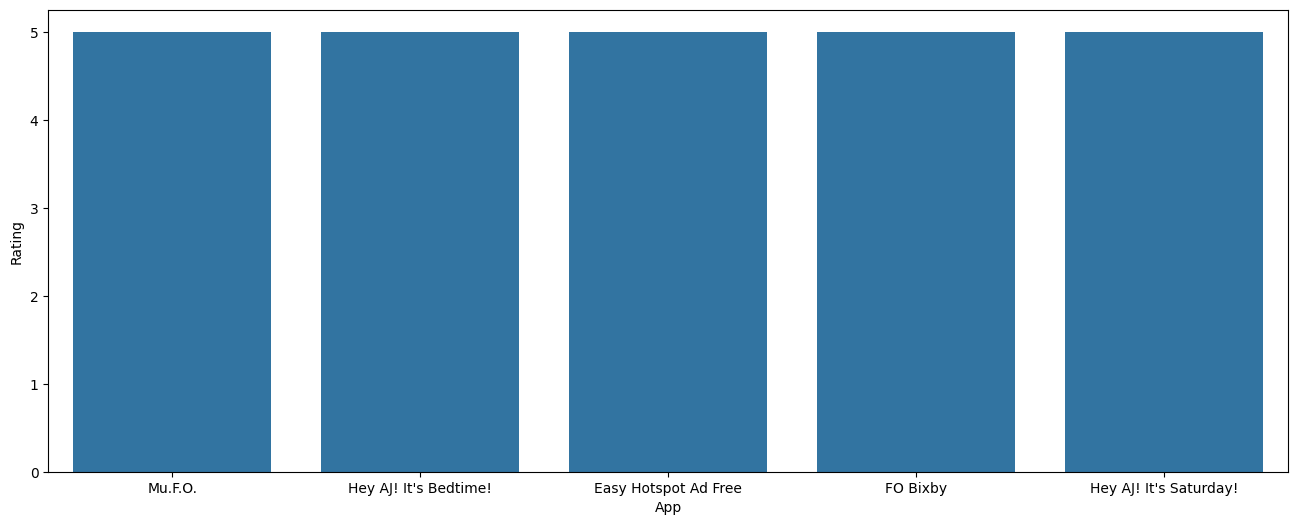

In [80]:
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', 
            data=df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head()) # plot the bar plot

In [81]:
# This Will Show Top 5 Paid category Apps With Respect To Rating
df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,size_in_MBs,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_category
10697,Mu.F.O.,GAME,5.0,2,16.00000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1,2.3 and up,Very Low
5246,Hey AJ! It's Bedtime!,FAMILY,5.0,1,63.00000,10,Paid,4.99,Everyone,Education,"April 4, 2018",1.0.59,2.3 and up,Very Low
4988,Easy Hotspot Ad Free,TOOLS,5.0,2,3.30000,10,Paid,0.99,Everyone,Tools,"July 26, 2018",1.05,4.0 and up,Very Low
10690,FO Bixby,PERSONALIZATION,5.0,5,0.84082,100,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up,Low
5237,Hey AJ! It's Saturday!,BOOKS_AND_REFERENCE,5.0,12,50.00000,100,Paid,3.99,Everyone,Books & Reference,"June 13, 2016",1.0.0,2.2 and up,Low


# plot top rated 5 apps in free category


<Axes: xlabel='App', ylabel='Rating'>

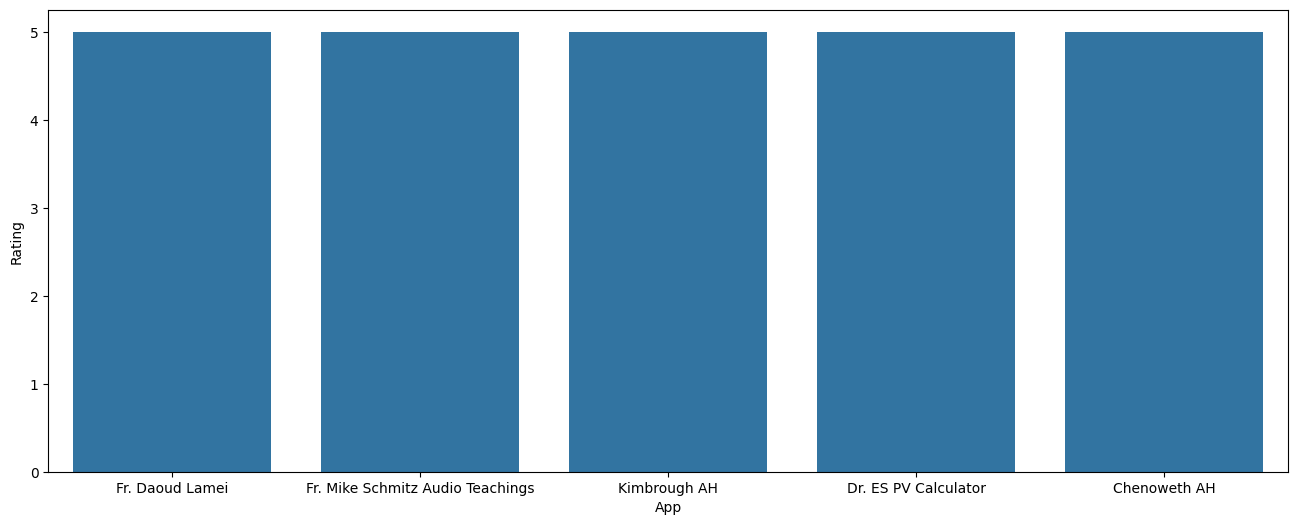

In [82]:
plt.figure(figsize=(16, 6)) # set figure size
sns.barplot(x='App', y='Rating', 
            data=df[df['Type']=='Free'].sort_values(by='Rating', ascending=False).head())

In [83]:
# Top 5 Free Category Apps With Respect To Rating
df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,size_in_MBs,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_category
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000,Free,0.0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up,Low
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up,Low
5148,Kimbrough AH,MEDICAL,5.0,5,28.0,100,Free,0.0,Everyone,Medical,"September 21, 2017",300000.0.90,4.0.3 and up,Low
9806,Dr. ES PV Calculator,TOOLS,5.0,19,11.0,500,Free,0.0,Everyone,Tools,"March 11, 2018",3.4.7.2.16,4.1 and up,Low
5139,Chenoweth AH,MEDICAL,5.0,1,27.0,100,Free,0.0,Everyone,Medical,"April 3, 2017",300000.0.78,4.0.3 and up,Low


# Plot top 5 FREE apps with highest number of reviews


<Axes: xlabel='App', ylabel='Reviews'>

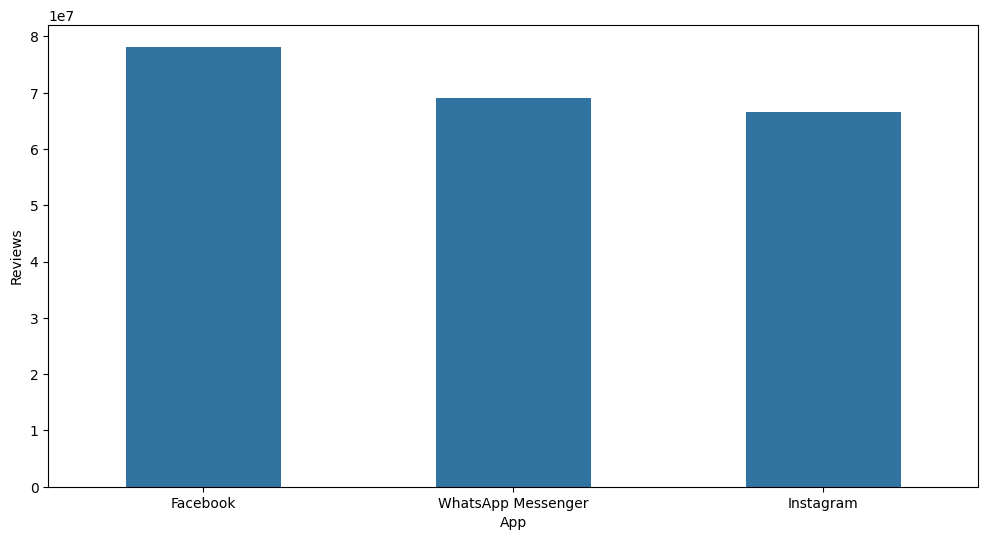

In [84]:
plt.figure(figsize=(12  , 6)) # make figure size
sns.barplot(x='App', y='Reviews', width=0.5,
            data=df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)) 

In [85]:
# Top 5 Free category Apps With Respect To Reviews 
df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)

,App,Category,Rating,Reviews,size_in_MBs,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_category
2544,Facebook,SOCIAL,4.1,78158306,17.681671,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,Top Notch
3943,Facebook,SOCIAL,4.1,78128208,17.681671,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,Top Notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,11.765673,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,Top Notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,11.765673,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,Top Notch
2604,Instagram,SOCIAL,4.5,66577446,17.681671,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,Top Notch


# Plot top 5 Paid apps with highest number of reviews


<Axes: xlabel='App', ylabel='Reviews'>

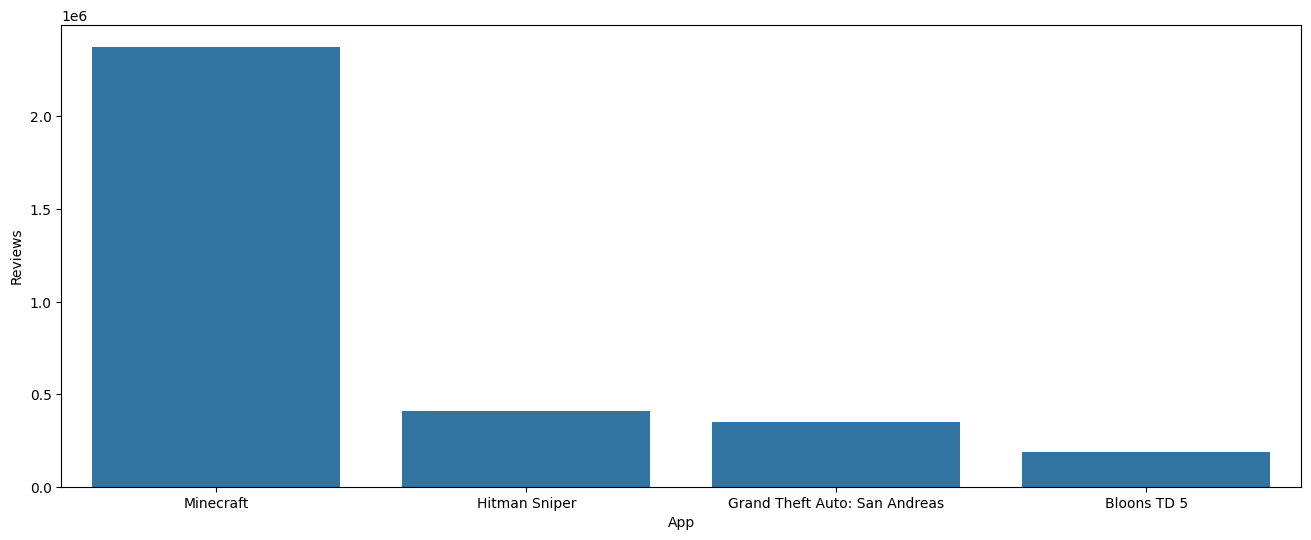

In [86]:
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', 
            data=df[df['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5)) 

In [87]:
# Top 5 Paid Apps With Respect To Reviews 
df[df['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5)

,App,Category,Rating,Reviews,size_in_MBs,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_category
2241,Minecraft,FAMILY,4.5,2376564,28.353764,10000000,Paid,6.99,Everyone 10+,Arcade,Action & Adventure,"July 24, 2018",1.5.2.1,Very High
4347,Minecraft,FAMILY,4.5,2375336,28.353764,10000000,Paid,6.99,Everyone 10+,Arcade,Action & Adventure,"July 24, 2018",1.5.2.1,Very High
4034,Hitman Sniper,GAME,4.6,408292,29.000000,10000000,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,Very High
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.000000,1000000,Paid,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,High
8860,Bloons TD 5,FAMILY,4.6,190086,94.000000,1000000,Paid,2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,High


# Plot Top 5 Expensive Apps 

<Axes: xlabel='App', ylabel='Installs'>

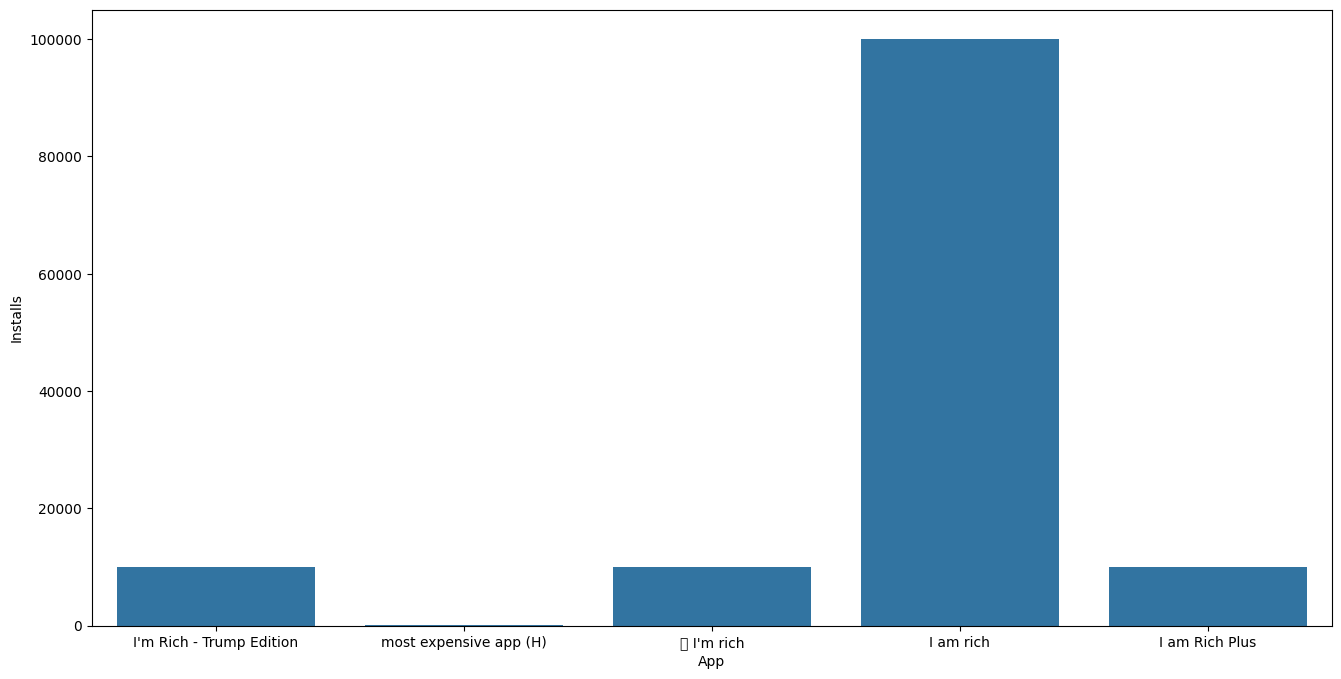

In [88]:
plt.figure(figsize=(16, 8)) # Set Figsize
sns.barplot(x='App', y='Installs', data=df.nlargest(5, 'Price'))

In [89]:
# Top 5 Expensive Apps

# Sorting the DataFrame by 'Price' in descending order and selecting the top 5
df.nlargest(5, 'Price')

,App,Category,Rating,Reviews,size_in_MBs,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,install_category
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,Moderate
4197,most expensive app (H),FAMILY,4.3,6,1.5,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1,7.0 and up,Low
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up,Moderate
5351,I am rich,LIFESTYLE,3.8,3547,1.8,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2,4.0.3 and up,More Than Moderate
5354,I am Rich Plus,FAMILY,4.0,856,8.7,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3,4.4 and up,Moderate


# Good Luck